In [26]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [27]:
#loading the data(cat/non-cat)
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes=load_dataset()

In [28]:
'''
Common steps for pre-processing a new dataset are: 
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, …) 
- Reshape the datasets such that each example is now a vector of size (num_px * num_px * 3, 1) 
- “Standardize” the data
'''
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
num_px=train_set_x_orig.shape[1]

In [29]:
train_set_x_flatten=train_set_x_orig.reshape(m_train,-1).T
test_set_x_flatten=test_set_x_orig.reshape(m_test,-1).T

#标准化
train_set_x=train_set_x_flatten/255
test_set_x=test_set_x_flatten/255

In [30]:
def sigmoid(z):
    s=1.0/(1+np.exp(-z))
    return s

In [31]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [32]:
def initialize_with_zeros(dim):
    
    w=np.zeros((dim,1))
    b=0
    
    assert(w.shape==(dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [33]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [34]:
def propagate(w,b,X,Y):
    m=X.shape[1]
    A=sigmoid(np.dot(w.T,X)+b)
    cost=-(1.0/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    dw=(1.0/m)*np.dot(X,(A-Y).T)
    db=(1.0/m)*np.sum(A-Y)
    
    assert(dw.shape==w.shape)
    assert(db.dtype==float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads,cost
    

In [35]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [36]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
    costs=[]
    for i in range(num_iterations):
        grads,cost=propagate(w,b,X,Y)
        
        dw=grads["dw"]
        db=grads["db"]
        
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        if i%100==0:
            costs.append(cost)
            
        if print_cost and i%100==0:
            print("Cost after iteration %i:%f" %(i,cost))
            
    params={
            "w":w,
            "b":b
        }
    
    grads={
            "dw":dw,
            "db":db
        }
    
    return params,grads,costs

In [37]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


In [38]:
def predict(w,b,X):
    m=X.shape[1]
    Y_prediction=np.zeros((1,m))
    w=w.reshape(X.shape[0],-1)
    
    A=sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
    
    assert(Y_prediction.shape==(1,m))
    
    return Y_prediction

In [39]:
def model(X_train,Y_train,X_test,Y_test,num_iterations=2000,learning_rate=0.5,print_cost=False):
    w,b=initialize_with_zeros(X_train.shape[0])
    parameters,grads,costs=optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    w=parameters["w"]
    b=parameters["b"]
    
    Y_prediction_test=predict(w,b,X_test)
    Y_prediction_train=predict(w,b,X_train)
    
    print("train accuracy:{} %".format(100-np.mean(np.abs(Y_prediction_train-Y_train))*100))
    print("test accuracy:{} %".format(100-np.mean(np.abs(Y_prediction_test-Y_test))*100))
    
    d={"costs":costs,
       "Y_prediction_test":Y_prediction_test,
       "Y_prediction_train":Y_prediction_train,
       "w":w,
       "b":b,
       "learning_rate":learning_rate,
       "num_iterations":num_iterations}
    
    return d

In [40]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0:0.693147
Cost after iteration 100:0.584508
Cost after iteration 200:0.466949
Cost after iteration 300:0.376007
Cost after iteration 400:0.331463
Cost after iteration 500:0.303273
Cost after iteration 600:0.279880
Cost after iteration 700:0.260042
Cost after iteration 800:0.242941
Cost after iteration 900:0.228004
Cost after iteration 1000:0.214820
Cost after iteration 1100:0.203078
Cost after iteration 1200:0.192544
Cost after iteration 1300:0.183033
Cost after iteration 1400:0.174399
Cost after iteration 1500:0.166521
Cost after iteration 1600:0.159305
Cost after iteration 1700:0.152667
Cost after iteration 1800:0.146542
Cost after iteration 1900:0.140872
train accuracy:99.04306220095694 %
test accuracy:70.0 %


In [41]:
train_set_y.shape

(1, 209)

y = 1, you predicted that it is a "cat" picture.


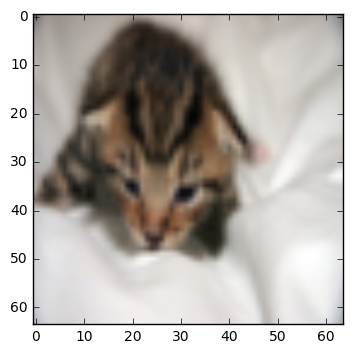

In [53]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))

m=int(d["Y_prediction_test"][0,index])
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[m].decode("utf-8") +  "\" picture.")


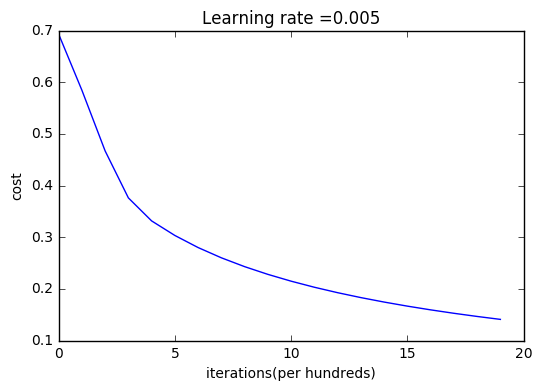

In [54]:
costs=np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations(per hundreds)')
plt.title("Learning rate ="+str(d["learning_rate"]))
plt.show()

learning rate is 0.01
train accuracy:99.52153110047847 %
test accuracy:68.0 %

---------------------------------------------

learning rate is 0.001
train accuracy:88.99521531100478 %
test accuracy:64.0 %

---------------------------------------------

learning rate is 0.0001
train accuracy:68.42105263157895 %
test accuracy:36.0 %

---------------------------------------------



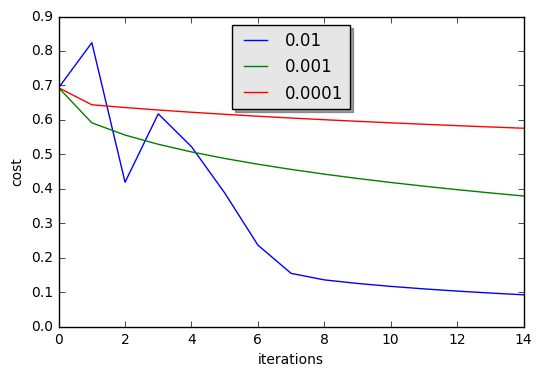

In [56]:
learning_rates=[0.01,0.001,0.0001]
models={}
for i in learning_rates:
    print("learning rate is "+ str(i))
    models[str(i)]=model(train_set_x,train_set_y,test_set_x,test_set_y,num_iterations=1500,learning_rate=i,print_cost=False)
    print('\n'+"---------------------------------------------"+'\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]),label=str(models[str(i)]["learning_rate"]))
    
plt.ylabel("cost")
plt.xlabel("iterations")

legend=plt.legend(loc='upper center',shadow=True)
frame=legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

C:\新建文件夹\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\新建文件夹\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):
C:\新建文件夹\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


y = 0.0, your algorithm predicts a "non-cat" picture.


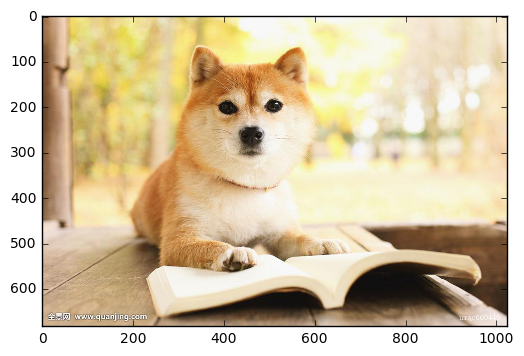

In [60]:
my_image="kk.jpg"
image=np.array(ndimage.imread(my_image,flatten=False))
my_image=scipy.misc.imresize(image,size=(num_px,num_px)).reshape((1,num_px*num_px*3)).T
my_predicted_image=predict(d["w"],d["b"],my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")